In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving adult_income.csv to adult_income.csv


In [ ]:
import pandas as pd
import io
dataset = pd.read_csv(io.BytesIO(uploaded['adult_income.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
dataset.head(5)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  country         32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
dataset.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
dataset.isnull().any()

age               False
workclass         False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
country           False
salary            False
dtype: bool

In [ ]:
dataset['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
salaryNums = dataset['salary'].value_counts()
salaryNums

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

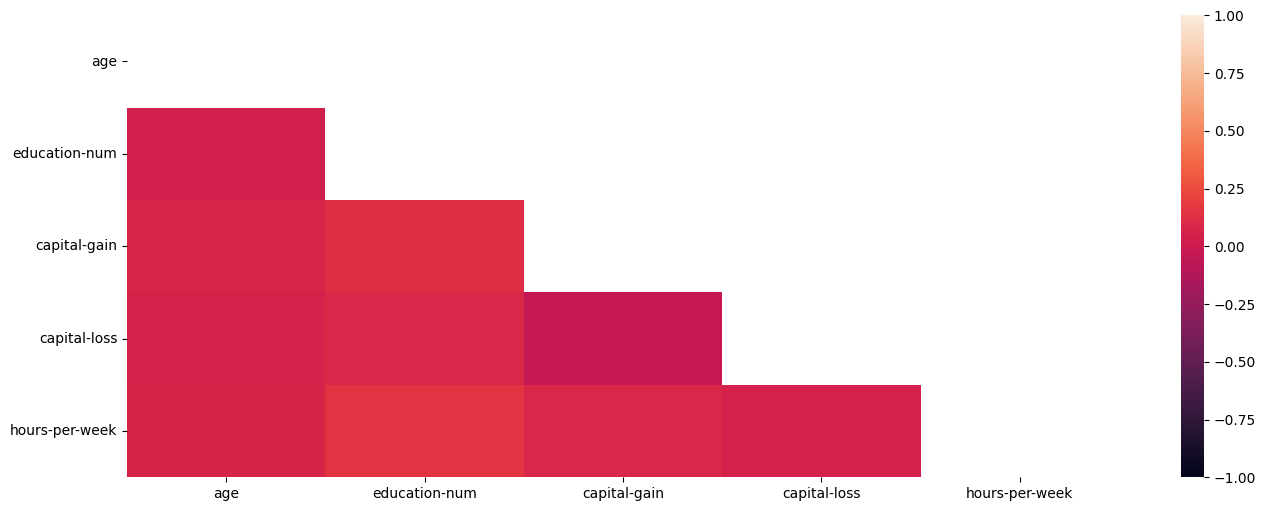

In [ ]:
# Create figure
plt.figure(figsize=(16, 6))
dataset['salary'] = dataset['salary'].apply(lambda x: 1 if x==' >50K' else 0)
# Isolate upper triangle of array and mask
mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataset.corr(), mask=mask, vmin=-1, vmax=1)

ValueError: ignored

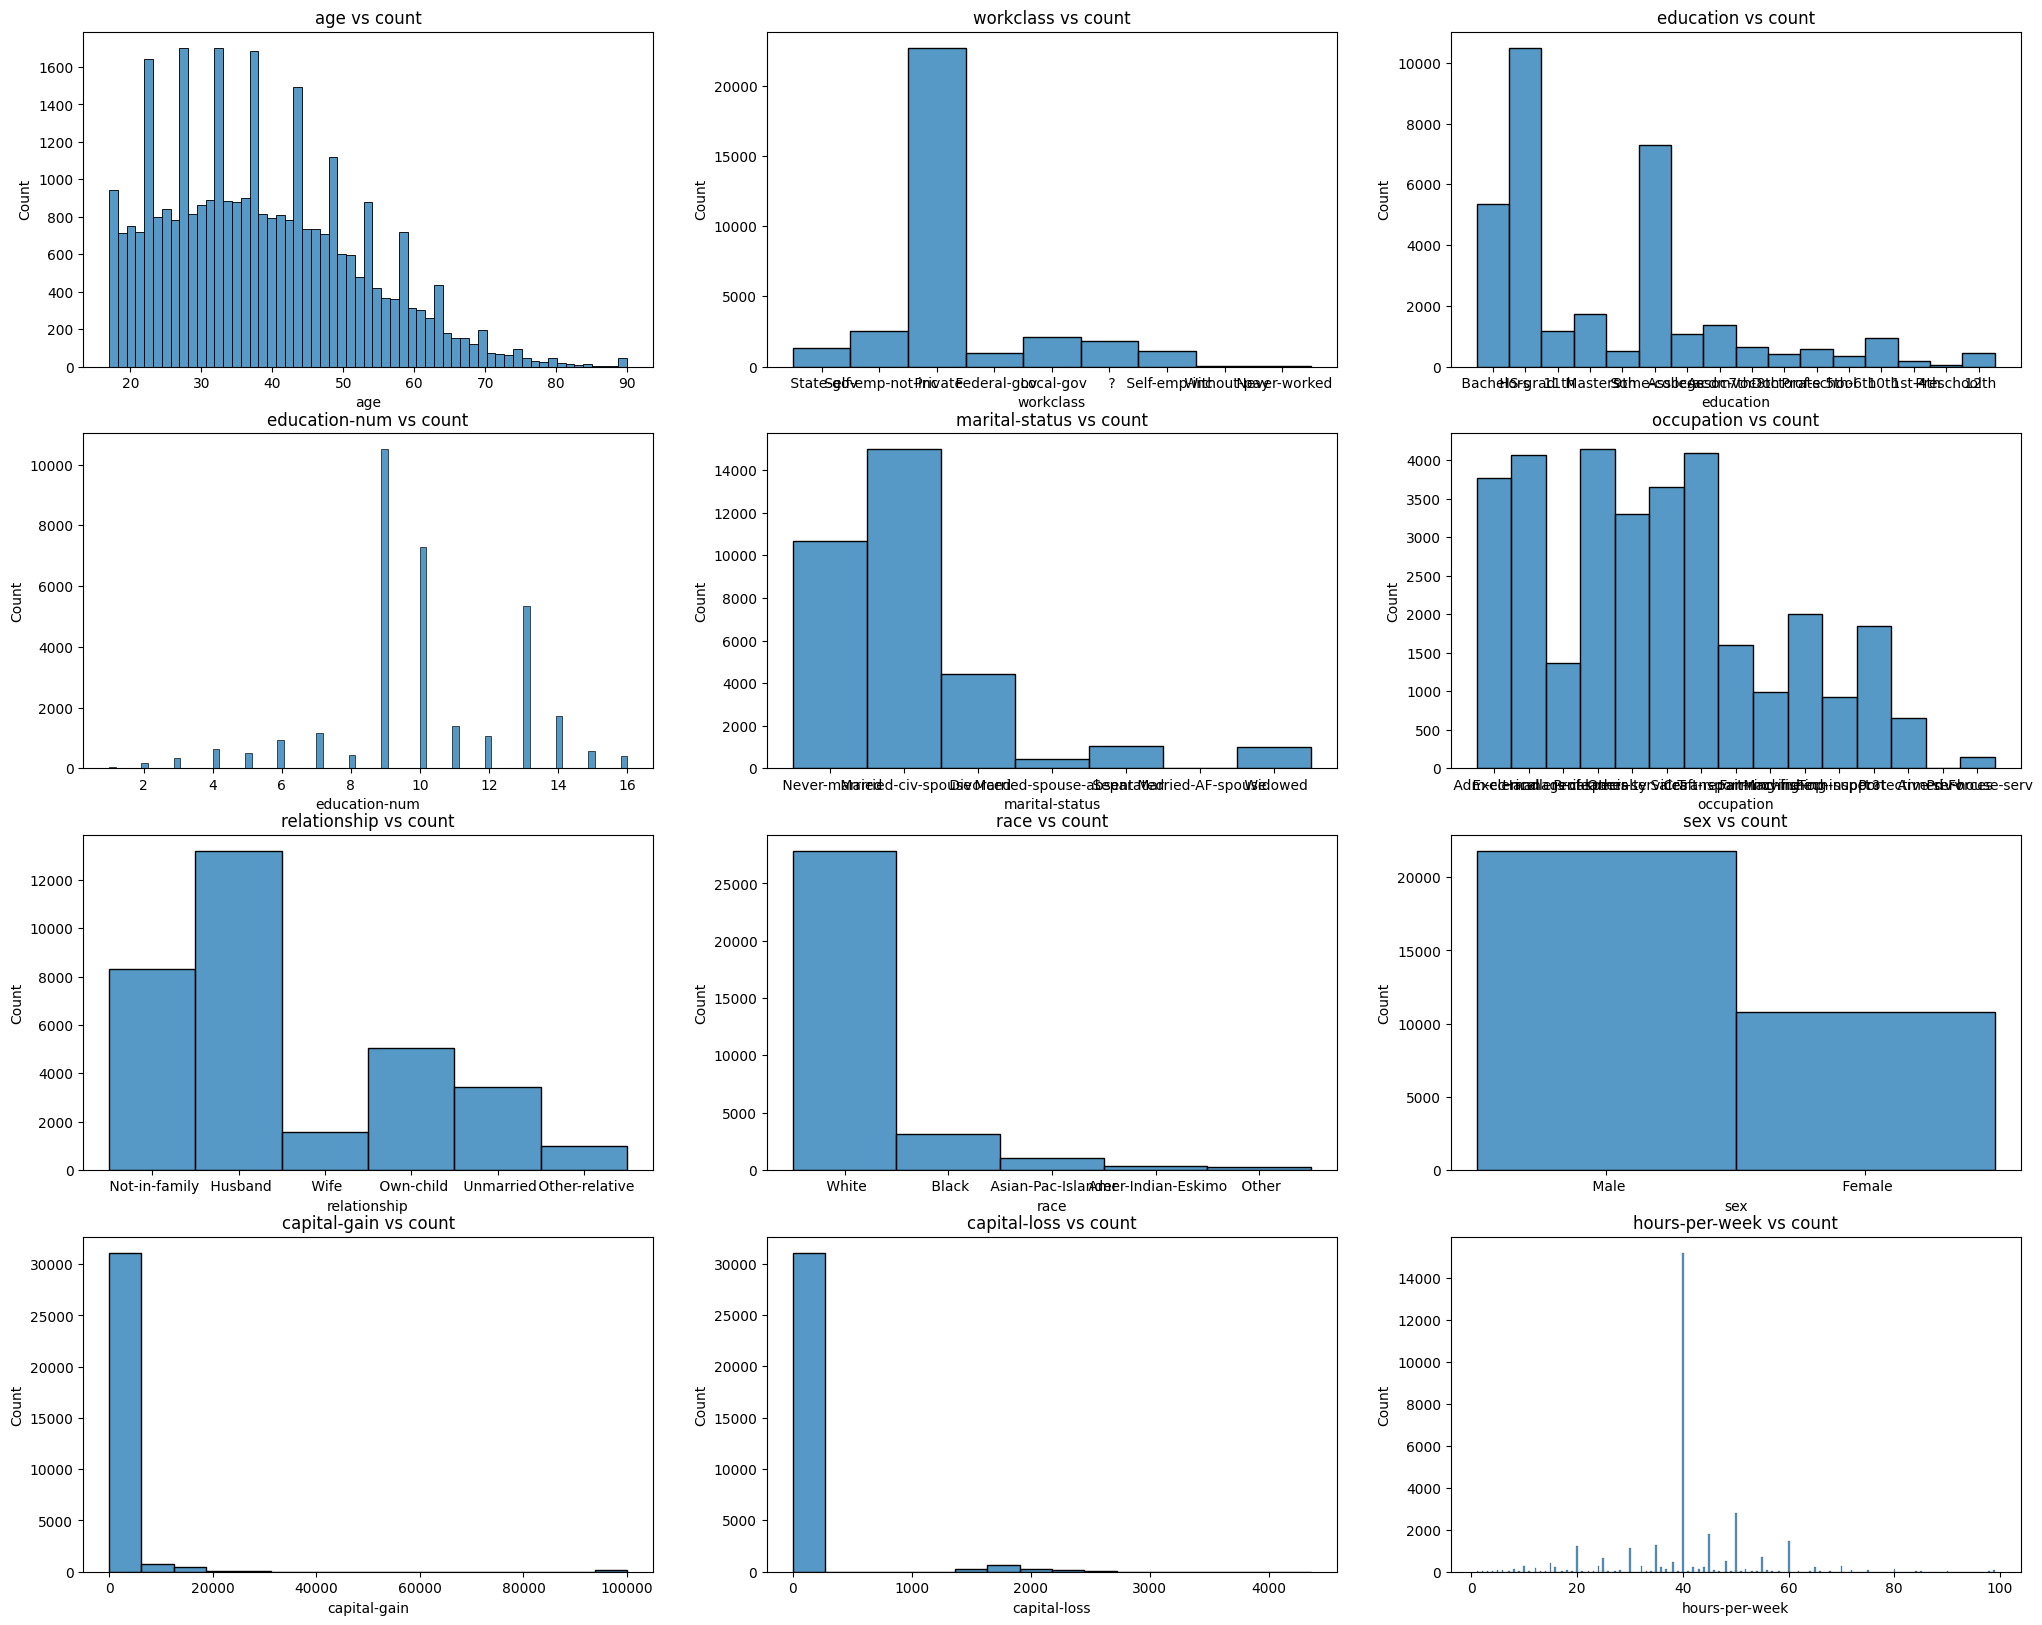

In [ ]:

a=4
b=3
c=1
# Set figure size
fig = plt.figure(figsize=(25,20))
for i in dataset.columns:
    plt.subplot(a, b, c)
    plt.title('{} vs count'.format(i))
    plt.xlabel(i)
    sns.histplot(dataset[i])
    c = c + 1

In [ ]:
## If larger than 50k then 1
## If less than 50k then 0

dataset['salary'] = dataset['salary'].apply(lambda x: 1 if x==' >50K' else 0)

In [ ]:
dataset['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

SOLVE CLASS IMBALANCE, DUPLICATE HIGHER SALARY DATA


In [ ]:
toAppend = dataset[dataset['salary']==1].head(7841)
dataset = dataset.append(toAppend)
dataset = dataset.append(toAppend)

In [ ]:
dataset['salary'].value_counts()

0    24720
1    23523
Name: salary, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Set SALARY values as y
y = dataset['salary'].values
y = y.reshape(-1,1)
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
x = dataset.values
x

array([[39, ' State-gov', ' Bachelors', ..., 40, ' United-States', 0],
       [50, ' Self-emp-not-inc', ' Bachelors', ..., 13, ' United-States',
        0],
       [38, ' Private', ' HS-grad', ..., 40, ' United-States', 0],
       ...,
       [53, ' Private', ' Masters', ..., 40, ' United-States', 1],
       [40, ' Private', ' HS-grad', ..., 40, ' United-States', 1],
       [52, ' Self-emp-inc', ' HS-grad', ..., 40, ' United-States', 1]],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [ ]:
# Verify split
print(xtrain.shape) 
print(xtest.shape) 
print(ytrain.shape) 
print(ytest.shape) 

(38594, 14)
(9649, 14)
(38594, 1)
(9649, 1)
